Enter the city name:  pune



Fetching weather data for pune...


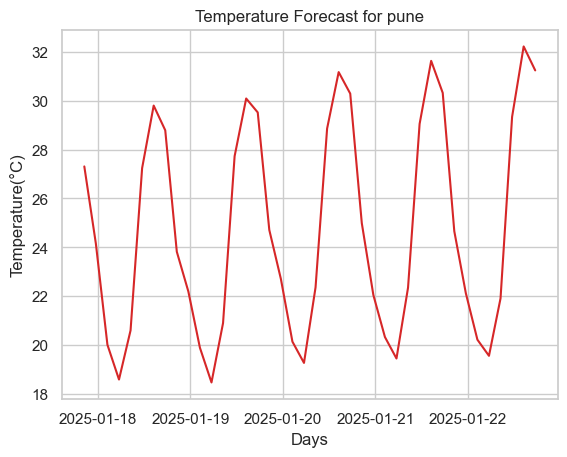

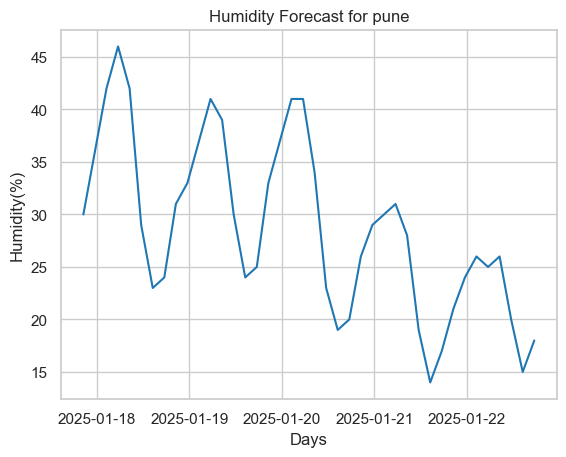

In [51]:
import requests
import matplotlib.pyplot as plt
import datetime

def fetch_data(city, api_key):
    if not city or not api_key:
        print("City name or API key is missing.")
        return None
    
    url = f"https://api.openweathermap.org/data/2.5/forecast?q={city}&units=metric&appid={api_key}"
    

    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            return response.json()
        else:
            error_message = response.json().get("message", "Unknown error")
            print(f"Failed to fetch data: {response.status_code} - {error_message}")
            return None
    except requests.exceptions.RequestException as e:
        print(f"Network error occurred: {e}")
        return None

def process_data(data):
    timestamps = []
    temperatures = []
    humidities = []
    
    for entry in data['list']:
        dt = datetime.datetime.fromtimestamp(entry['dt'])
        timestamps.append(dt)
        temperatures.append(entry['main']['temp'])
        humidities.append(entry['main']['humidity'])
    
    return timestamps, temperatures, humidities


def plot_graph(city, timestamps, temperatures, humidities):
    
    # Temperature Plot
    plt.plot(timestamps, temperatures,color="tab:red")
    plt.title(f"Temperature Forecast for {city}")
    plt.xlabel("Days")
    plt.ylabel("Temperature(°C)")
    plt.show()

    #  Humidity Plot
    plt.plot(timestamps, humidities, color="tab:blue")
    plt.title(f"Humidity Forecast for {city}")
    plt.xlabel("Days")
    plt.ylabel("Humidity(%)")
    plt.show()


city = input("Enter the city name: ")
api_key = '071564c0a3c3b2f268ef9e25a8bbeeeb' 
    
print(f"\nFetching weather data for {city}...")

data = fetch_data(city, api_key)
    
    
timestamps, temperatures, humidities = process_data(data)
    
plot_graph(city, timestamps, temperatures, humidities)
   
